## 세팅

In [14]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import timedelta
import matplotlib.font_manager as fm
import matplotlib as mpl
import ast
import json
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.expand_frame_repr', False)

from collections import Counter
from kiwipiepy import Kiwi


In [15]:
def read_parquet_from_gcs(file_names, gcs_prefix, key_path):
    dfs = {}
    for name in file_names:
        path = f"{gcs_prefix}/{name}.parquet"
        dfs[name] = pd.read_parquet(path, storage_options={"token": key_path})
    return dfs


file_list = [
    "accounts_attendance",
    "accounts_blockrecord",
    "accounts_failpaymenthistory",
    "accounts_friendrequest",
    "accounts_group",
    "accounts_nearbyschool",
    "accounts_paymenthistory",
    "accounts_user_contacts",
    "accounts_pointhistory",
    "accounts_school",
    "accounts_timelinereport",
    "accounts_user",
    "accounts_userquestionrecord",
    "accounts_userwithdraw",
    "event_receipts",
    "events",
    "polls_question",
    "polls_questionpiece",
    "polls_questionreport",
    "polls_questionset",
    "polls_usercandidate"
]

gcs_prefix = "gs://codeit-project/votes"
key_path = "./config/key.json"

dfs = read_parquet_from_gcs(file_list, gcs_prefix, key_path)

# 출석 테이블
accounts_attendance = dfs["accounts_attendance"]

# 차단 기록 테이블
accounts_blockrecord = dfs["accounts_blockrecord"]

# 상품 구매 실패 기록 테이블
accounts_failpaymenthistory = dfs["accounts_failpaymenthistory"]

# 친구 요청 테이블
accounts_friendrequest = dfs["accounts_friendrequest"]

# 그룹 테이블
accounts_group = dfs["accounts_group"]

# 근처 학교 테이블
accounts_nearbyschool = dfs["accounts_nearbyschool"]

# 결제 기록 테이블
accounts_paymenthistory = dfs["accounts_paymenthistory"]

# 사용자 연락처 테이블
accounts_user_contacts = dfs["accounts_user_contacts"]

# 포인트 내역 테이블
accounts_pointhistory = dfs["accounts_pointhistory"]

# 학교 정보 테이블
accounts_school = dfs["accounts_school"]

# 타임라인 신고 기록 테이블
accounts_timelinereport = dfs["accounts_timelinereport"]

# 사용자 기본 정보 테이블
accounts_user = dfs["accounts_user"]

# 사용자 질문 응답 기록 테이블
accounts_userquestionrecord = dfs["accounts_userquestionrecord"]

# 회원 탈퇴 기록 테이블
accounts_userwithdraw = dfs["accounts_userwithdraw"]

# 이벤트 영수증 테이블
event_receipts = dfs["event_receipts"]

# 이벤트 테이블
events = dfs["events"]

# 질문 테이블
polls_question = dfs["polls_question"]

# 질문 조각 테이블
polls_questionpiece = dfs["polls_questionpiece"]

# 질문 신고 테이블
polls_questionreport = dfs["polls_questionreport"]

# 질문 세트 테이블
polls_questionset = dfs["polls_questionset"]

# 사용자 후보 응답 테이블
polls_usercandidate = dfs["polls_usercandidate"]

### 차단기록

In [16]:
# 확인
accounts_blockrecord.head()

,id,reason,created_at,block_user_id,user_id
0,1,그냥...,2023-05-04 23:01:53,867483,878476
1,2,친구 사이가 어색해짐,2023-05-05 01:17:08,867190,867564
2,3,나랑 관련 없는 질문을 자꾸 보냄,2023-05-05 01:50:55,875110,875261
3,6,그냥...,2023-05-05 05:21:52,883696,883511
4,7,그냥...,2023-05-05 06:40:34,871349,870177


In [17]:
display(accounts_blockrecord.info())
print('--------')
display(accounts_blockrecord.created_at.min())
print('--------')
display(accounts_blockrecord.created_at.max())
print('--------')
display(accounts_blockrecord.reason.nunique())
print('--------')
display(accounts_blockrecord.reason.value_counts())
print('--------')
display(accounts_blockrecord.user_id.nunique())
print('--------')
display(accounts_blockrecord.block_user_id.nunique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19482 entries, 0 to 19481
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             19482 non-null  int64         
 1   reason         19482 non-null  object        
 2   created_at     19482 non-null  datetime64[ns]
 3   block_user_id  19482 non-null  int64         
 4   user_id        19482 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 761.1+ KB


None

--------


Timestamp('2023-05-04 23:01:53')

--------


Timestamp('2024-05-06 13:03:37')

--------


7

--------


reason
모르는 사람임               9640
친구 사이가 어색해짐           5805
사칭 계정                 2022
나랑 관련 없는 질문을 자꾸 보냄    1083
너무 많은 양의 질문을 보냄        919
기타                       7
그냥...                    6
Name: count, dtype: int64

--------


12552

--------


16240

### 신고기록

In [18]:
accounts_timelinereport.head()

,id,reason,created_at,reported_user_id,user_id,user_question_record_id
0,28,타인을 사칭함,2023-05-06 04:44:57,874587,885082,3920588
1,37,친구를 비하하거나 조롱하는 어투,2023-05-06 05:41:19,881048,881298,4018679
2,46,친구를 비하하거나 조롱하는 어투,2023-05-06 06:26:59,887882,881945,4120914
3,64,허위 사실 언급,2023-05-06 07:07:46,888610,893684,4143049
4,65,허위 사실 언급,2023-05-06 07:07:52,888610,893684,4143049


In [19]:
display(accounts_timelinereport.info())
print('-----')
display(accounts_timelinereport.created_at.min())
print('-----')
display(accounts_timelinereport.created_at.max())
print('-----')
display(accounts_timelinereport.reason.nunique())
print('-----')
display(accounts_timelinereport.reason.unique())
print('-----')
display(accounts_timelinereport.reason.value_counts())
print('-----')
display(accounts_timelinereport.user_id.nunique())
print('-----')
display(accounts_timelinereport.reported_user_id.nunique())
print('-----')
display(accounts_timelinereport.user_question_record_id.nunique())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       208 non-null    int64         
 1   reason                   208 non-null    object        
 2   created_at               208 non-null    datetime64[ns]
 3   reported_user_id         208 non-null    int64         
 4   user_id                  208 non-null    int64         
 5   user_question_record_id  208 non-null    int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 9.9+ KB


None

-----


Timestamp('2023-05-06 04:44:57')

-----


Timestamp('2023-06-02 08:30:06')

-----


5

-----


array(['타인을 사칭함', '친구를 비하하거나 조롱하는 어투', '허위 사실 언급', '선정적이거나 폭력적인 내용', '광고'],
      dtype=object)

-----


reason
허위 사실 언급             80
친구를 비하하거나 조롱하는 어투    64
선정적이거나 폭력적인 내용       39
타인을 사칭함              15
광고                   10
Name: count, dtype: int64

-----


115

-----


125

-----


163

### 유저기록

In [20]:
accounts_user.head()

,id,is_superuser,is_staff,gender,point,friend_id_list,is_push_on,created_at,block_user_id_list,hide_user_id_list,ban_status,report_count,alarm_count,pending_chat,pending_votes,group_id
0,831956,1,1,None,600,"[1292473, 913158, 1488461, 1064695, 1043565, 1...",0,2023-03-29 03:44:14.047130,[],[],N,0,0,0,0,NaN
1,831962,0,0,F,2248,"[833025, 832642, 982531, 879496, 838541, 83752...",1,2023-03-29 05:18:56.162368,[],[],N,253,40878,5499,110,12.0
2,832151,0,0,M,1519,"[838785, 982531, 882567, 879496, 838541, 83649...",0,2023-03-29 12:56:34.989468,[],[],N,0,37,0,47,1.0
3,832340,0,0,F,57,"[841345, 982531, 838785, 963714, 882567, 83252...",1,2023-03-29 12:56:35.020790,[],[],N,0,19,0,21,1.0
4,832520,0,0,M,1039,"[874050, 849763, 874212, 844297, 838541, 84004...",0,2023-03-29 12:56:35.049311,[],[],N,0,29,0,15,12.0


In [21]:
display(accounts_user.info())
print('-----')
display(accounts_user.created_at.min())
print('-----')
display(accounts_user.created_at.max())
# print('-----')
# display(accounts_user.reason.nunique())
# print('-----')
# display(accounts_user.reason.unique())
# print('-----')
# display(accounts_user.reason.value_counts())
print('-----')
display(accounts_user.id.nunique())
# print('-----')
# display(accounts_user.reported_user_id.nunique())
# print('-----')
# display(accounts_user.user_question_record_id.nunique())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 677085 entries, 0 to 677084
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  677085 non-null  int64         
 1   is_superuser        677085 non-null  int64         
 2   is_staff            677085 non-null  int64         
 3   gender              677083 non-null  object        
 4   point               677085 non-null  int64         
 5   friend_id_list      677085 non-null  object        
 6   is_push_on          677085 non-null  int64         
 7   created_at          677085 non-null  datetime64[ns]
 8   block_user_id_list  677085 non-null  object        
 9   hide_user_id_list   677085 non-null  object        
 10  ban_status          677085 non-null  object        
 11  report_count        677085 non-null  int64         
 12  alarm_count         677085 non-null  int64         
 13  pending_chat        677085 no

None

-----


Timestamp('2023-03-29 03:44:14.047130')

-----


Timestamp('2024-05-09 08:31:17.710824')

-----


677085

In [22]:
accounts_user['is_superuser'].value_counts()

is_superuser
0    677083
1         2
Name: count, dtype: int64

In [23]:
accounts_user[accounts_user['is_superuser'] == 1]

,id,is_superuser,is_staff,gender,point,friend_id_list,is_push_on,created_at,block_user_id_list,hide_user_id_list,ban_status,report_count,alarm_count,pending_chat,pending_votes,group_id
0,831956,1,1,None,600,"[1292473, 913158, 1488461, 1064695, 1043565, 1...",0,2023-03-29 03:44:14.047130,[],[],N,0,0,0,0,NaN
673996,1580626,1,0,M,300,[],1,2023-09-23 06:11:32.028322,[],[],N,0,0,0,0,122.0


In [24]:
accounts_user['group_id'].nunique()

80912

### 질문

In [25]:
polls_question.head()

,id,question_text,created_at
0,99,가장 신비한 매력이 있는 사람은?,2023-03-31 15:22:53
1,100,"""이 사람으로 한 번 살아보고 싶다"" 하는 사람은?",2023-03-31 15:22:53
2,101,미래의 틱톡커는?,2023-03-31 15:22:54
3,102,여기서 제일 특이한 친구는?,2023-03-31 15:22:54
4,103,가장 지켜주고 싶은 사람은?,2023-03-31 15:22:55


In [26]:
display(polls_question.info())
print('-----')
display(polls_question.created_at.min())
print('-----')
display(polls_question.created_at.max())
print('-----')
display(polls_question.question_text.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5025 entries, 0 to 5024
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             5025 non-null   int64         
 1   question_text  5025 non-null   object        
 2   created_at     5025 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 117.9+ KB


None

-----


Timestamp('2023-03-31 15:22:53')

-----


Timestamp('2023-06-06 06:15:52')

-----


3903

In [27]:
display(polls_question.question_text.unique())

array(['가장 신비한 매력이 있는 사람은?', '"이 사람으로 한 번 살아보고 싶다" 하는 사람은?', '미래의 틱톡커는?',
       ..., '사달라는거 다 사줄 것 같은 사람은?',
       '할머니,  할아버지가 돼도 이 친구만큼은 연락하고 지낼 것 같아!', '개학 하자마자 인사 될것 같은 사람'],
      shape=(3903,), dtype=object)

In [28]:
polls_question.head(20)

,id,question_text,created_at
0,99,가장 신비한 매력이 있는 사람은?,2023-03-31 15:22:53
1,100,"""이 사람으로 한 번 살아보고 싶다"" 하는 사람은?",2023-03-31 15:22:53
2,101,미래의 틱톡커는?,2023-03-31 15:22:54
3,102,여기서 제일 특이한 친구는?,2023-03-31 15:22:54
4,103,가장 지켜주고 싶은 사람은?,2023-03-31 15:22:55
5,104,내 어깨를 내어줄 수 있는 사람은?,2023-03-31 15:22:56
6,105,볼 한 번 눌러보고 싶은 사람은?,2023-03-31 15:22:57
7,106,은근히 애교가 많을 것 같은 사람은?,2023-03-31 15:22:57
8,107,누가 봐도 좋아할 것 같은 호감인 사람은?,2023-03-31 15:22:57
9,108,가장 매력적인 사람은?,2023-03-31 15:22:58


#### polls 심화

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_prop = fm.FontProperties(fname=font_path)

- 시각화
type_counts.plot(kind='bar', figsize=(12, 6))
plt.title('시도별 중고등학교 수', fontproperties=font_prop)

[('시간', 70), ('연락', 53), ('노래', 51), ('생각', 49), ('매력', 48), ('연애', 45), ('공부', 42), ('인스타', 41), ('머리', 38), ('게임', 38), ('생일', 38), ('선물', 37), ('애인', 37), ('전화', 36), ('사진', 36), ('미래', 35), ('결혼', 35), ('하루', 33), ('인생', 32), ('사랑', 31), ('고백', 30), ('노래방', 29), ('카페', 29), ('영화', 28), ('얼굴', 25), ('혼자', 24), ('인기', 23), ('목소리', 23), ('시험', 22), ('이상', 21)]


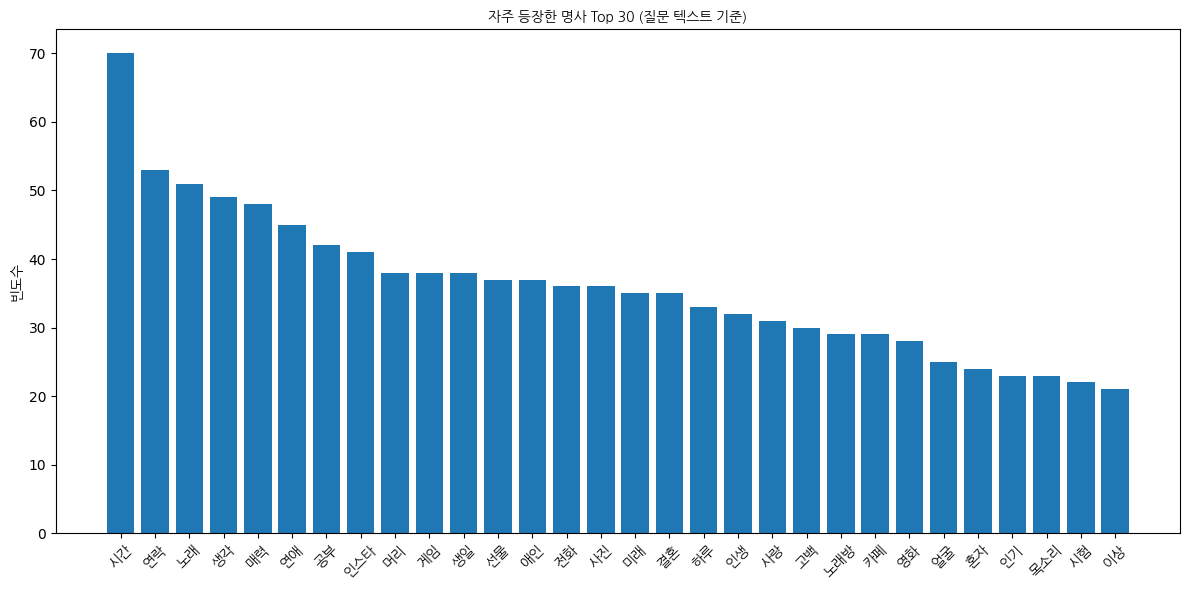

In [ ]:
# pip install kiwipiepy
# from kiwipiepy import Kiwi
# from collections import Counter

# 1. Kiwi 초기화
kiwi = Kiwi()

# 2. question_text 컬럼에서 명사 추출
nouns_all = []

for sentence in polls_question['question_text'].dropna():
    tokens = kiwi.tokenize(sentence)
    nouns = [token.form for token in tokens if token.tag.startswith('N') and len(token.form) > 1]
    nouns_all.extend(nouns)

# 3. 불용어 제거 (원하는 경우)
stopwords = ['사람', '친구', '학교', '누구', '이유', '경우', '여기', '우리', '나중', '제일']
filtered_nouns = [word for word in nouns_all if word not in stopwords]

# 4. 단어 빈도 계산
word_counts = Counter(filtered_nouns)
top_n = word_counts.most_common(30)

# 5. 결과 출력
print(top_n)

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_prop = fm.FontProperties(fname=font_path)


# 6. 시각화 (막대 그래프)
words, counts = zip(*top_n)
plt.figure(figsize=(12, 6))
plt.bar(words, counts)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.title("자주 등장한 명사 Top 30 (질문 텍스트 기준)", fontproperties=font_prop)
plt.ylabel("빈도수", fontproperties=font_prop)
plt.tight_layout()
plt.show()

In [105]:
top_n_df = pd.DataFrame(top_n, columns=['word', 'count'])
top_n_df.head()

,word,count
0,시간,70
1,연락,53
2,노래,51
3,생각,49
4,매력,48


### 질문에 대한 신고기록 테이블

In [110]:
polls_questionreport.head()

,id,reason,created_at,question_id,user_id
0,1,이 질문은 재미없어요,2023-04-19 06:20:35,250,837556
1,2,이 질문은 재미없어요,2023-04-19 06:58:09,113,837672
2,3,불쾌한 내용이 포함되어 있음,2023-04-19 06:58:17,113,837672
3,4,어떻게 이런 생각을? 이 질문 최고!,2023-04-19 08:12:42,119,837922
4,5,어떻게 이런 생각을? 이 질문 최고!,2023-04-19 08:12:50,119,837922


In [115]:
polls_questionreport.reason.value_counts()

reason
그냥 싫어                   28446
나랑 맞지 않는 질문인 것 같음        9541
불쾌한 질문 내용                5386
자꾸 같은 내용의 질문 반복          3202
어떻게 이런 생각을? 이 질문 최고!     1821
한 친구가 질문을 반복적으로 보냄       1701
기타                        480
이 질문은 재미없어요               471
불쾌한 내용이 포함되어 있음           250
오타가 있음                     68
선정적이거나 자극적인 질문             58
Name: count, dtype: int64

[('반복', 4903), ('기타', 480), ('오타', 68), ('선정', 58), ('자극', 58)]


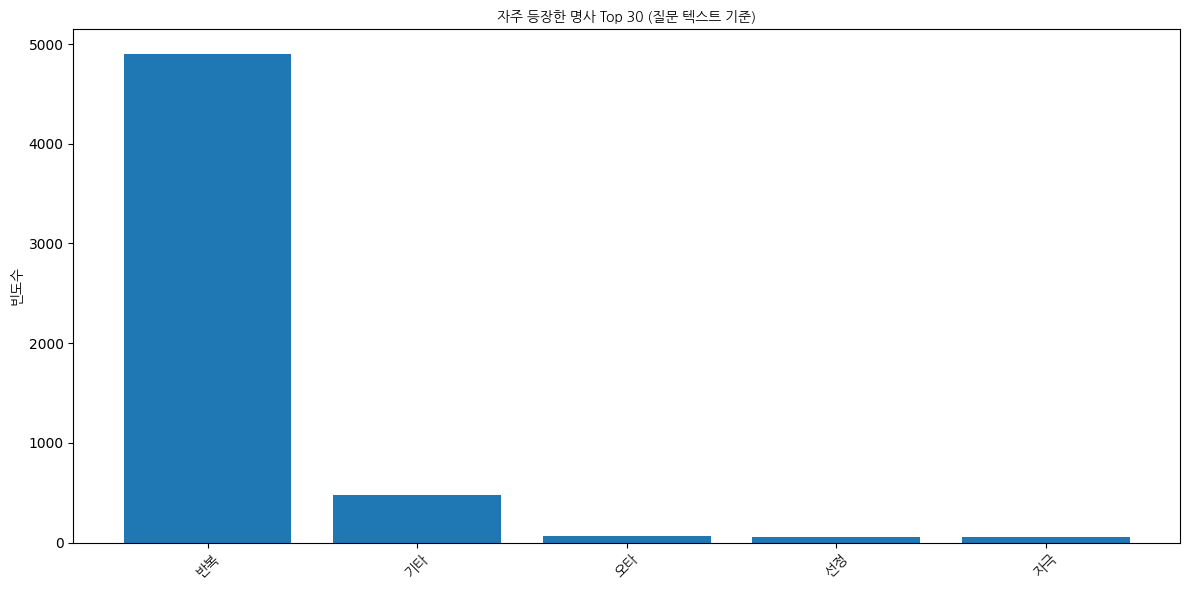

In [114]:
# pip install kiwipiepy
# from kiwipiepy import Kiwi
# from collections import Counter

# 1. Kiwi 초기화
kiwi = Kiwi()

# 2. question_text 컬럼에서 명사 추출
nouns_all = []

for sentence in polls_questionreport['reason'].dropna():
    tokens = kiwi.tokenize(sentence)
    nouns = [token.form for token in tokens if token.tag.startswith('N') and len(token.form) > 1]
    nouns_all.extend(nouns)

# 3. 불용어 제거 (원하는 경우)
stopwords = ['질문', '이', '포함', '내용', '이유', '경우', '생각', '우리', '친구', '최고']
filtered_nouns = [word for word in nouns_all if word not in stopwords]

# 4. 단어 빈도 계산
word_counts = Counter(filtered_nouns)
top_n = word_counts.most_common(30)

# 5. 결과 출력
print(top_n)

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_prop = fm.FontProperties(fname=font_path)


# 6. 시각화 (막대 그래프)
words, counts = zip(*top_n)
plt.figure(figsize=(12, 6))
plt.bar(words, counts)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.title("자주 등장한 명사 Top 30 (질문 텍스트 기준)", fontproperties=font_prop)
plt.ylabel("빈도수", fontproperties=font_prop)
plt.tight_layout()
plt.show()

### 학교 테이블

In [30]:
accounts_school.head()

,id,address,student_count,school_type
0,4,충청북도 충주시,239,H
1,5,충청북도 충주시,160,M
2,6,충청북도 충주시,200,H
3,7,충청북도 충주시,114,H
4,8,충청북도 충주시,139,M


In [31]:
display(accounts_school.info())
print('-----')
display(accounts_school.address.nunique())
print('-----')
display(accounts_school.school_type.value_counts())
print('-----')
display(accounts_school.student_count.min())
print('-----')
display(accounts_school.student_count.max())
print('-----')
display(accounts_school.student_count.mean())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5951 entries, 0 to 5950
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             5951 non-null   int64 
 1   address        5951 non-null   object
 2   student_count  5951 non-null   int64 
 3   school_type    5951 non-null   object
dtypes: int64(2), object(2)
memory usage: 186.1+ KB


None

-----


278

-----


school_type
M    3290
H    2661
Name: count, dtype: int64

-----


np.int64(0)

-----


np.int64(578)

-----


np.float64(113.77297933120484)

In [32]:
accounts_school['address'].value_counts()

address
경기도 화성시           78
경기도 부천시           60
경상남도 김해시          58
경기도 남양주시          58
대구광역시 달서구         56
서울특별시 노원구         54
경기도 성남시 분당구       53
서울특별시 송파구         52
광주광역시 북구          52
제주특별자치도 제주시       52
경상북도 구미시          50
대전광역시 서구          50
충청남도 세종특별자치시      49
경기도 평택시           49
서울특별시 강남구         49
경기도 파주시           48
인천광역시 서구          47
서울특별시 강서구         47
전라북도 익산시          46
경상남도 진주시          45
광주광역시 광산구         45
인천광역시 부평구         45
전라북도 전주시 완산구      42
경상북도 포항시 북구       42
대구광역시 북구          42
경기도 시흥시           42
전라남도 여수시          41
인천광역시 남동구         41
강원도 원주시           41
경상북도 경주시          40
대구광역시 수성구         40
대전광역시 유성구         40
경기도 김포시           39
경기도 고양시 덕양구       38
인천광역시 연수구         38
전라남도 순천시          38
서울특별시 은평구         38
부산광역시 부산진구        37
경기도 의정부시          37
강원도 춘천시           37
서울특별시 관악구         36
광주광역시 남구          35
서울특별시 강동구         35
충청북도 충주시          34
경기도 수원시 영통구       34
서울특별시 양천구         34
전라북도 전주시 덕진구      33
충청남도 

In [33]:
accounts_school['address'].unique()

array(['충청북도 충주시', '충청북도 청주시 흥덕구', '충청북도 청주시 청원구', '충청북도 청주시 서원구',
       '충청북도 청주시 상당구', '충청북도 진천군', '충청북도 증평군', '충청북도 제천시', '충청북도 음성군',
       '충청북도 옥천군', '충청북도 영동군', '충청북도 보은군', '충청북도 단양군', '충청북도 괴산군',
       '충청남도 홍성군', '충청남도 태안군', '충청남도 청양군', '충청남도 천안시 서북구', '충청남도 천안시 동남구',
       '충청남도 예산군', '충청남도 아산시', '충청남도 서천군', '충청남도 서산시', '충청남도 부여군',
       '충청남도 보령시', '충청남도 당진시', '충청남도 논산시', '충청남도 금산군', '충청남도 공주시',
       '충청남도 계룡시', '제주특별자치도 제주시', '제주특별자치도 서귀포시', '전북 정읍시', '전라북도 진안군',
       '전라북도 정읍시', '전라북도 전주시 완산구', '전라북도 전주시 덕진구', '전라북도 장수군', '전라북도 임실군',
       '전라북도 익산시', '전라북도 완주군', '전라북도 순창군', '전라북도 부안군', '전라북도 무주군',
       '전라북도 남원시', '전라북도 김제시', '전라북도 군산시', '전라북도 고창군', '전라남도 화순군',
       '전라남도 해남군', '전라남도 함평군', '전라남도 진도군', '전라남도 장흥군', '전라남도 장성군',
       '전라남도 완도군', '전라남도 영암군', '전라남도 영광군', '전라남도 여수시', '전라남도 신안군',
       '전라남도 순천시', '전라남도 보성군', '전라남도 무안군', '전라남도 목포시', '전라남도 담양군',
       '전라남도 나주시', '전라남도 구례군', '전라남도 광양시', '전라남도 곡성군', '전라남도 고흥군',
       '전라남도 강진군', '인천광역시 중구', '인천광역시

In [34]:
accounts_school[accounts_school['address'].str.startswith('대한')]['address'].value_counts()

address
대한민국 강원도 철원군    1
Name: count, dtype: int64

In [35]:
# 주소 통일

accounts_school['address'] = accounts_school['address'].str.replace(
    r'^서울\s', '서울특별시 ', regex=True
)

accounts_school['address'] = accounts_school['address'].str.replace(
    r'^경기\s', '경기도 ', regex=True
)

accounts_school['address'] = accounts_school['address'].str.replace(
    r'^강원\s', '강원도 ', regex=True
)
accounts_school['address'] = accounts_school['address'].str.replace(
    r'^강원도\s', '강원특별자치도 ', regex=True
)

accounts_school['address'] = accounts_school['address'].str.replace(
    r'^충북\s', '충청북도 ', regex=True
)

accounts_school['address'] = accounts_school['address'].str.replace(
    r'^충남\s', '충청남도 ', regex=True
)

accounts_school['address'] = accounts_school['address'].str.replace(
    r'^전북\s', '전북특별자치도 ', regex=True
)

accounts_school['address'] = accounts_school['address'].str.replace(
    r'^전라북도\s', '전북특별자치도 ', regex=True
)

accounts_school['address'] = accounts_school['address'].str.replace(
    r'^전남\s', '전라남도 ', regex=True
)

accounts_school['address'] = accounts_school['address'].str.replace(
    r'^경북\s', '경상북도 ', regex=True
)

accounts_school['address'] = accounts_school['address'].str.replace(
    r'^경남\s', '경상남도 ', regex=True
)

accounts_school['address'] = accounts_school['address'].str.replace(
    r'^대구\s', '대구광역시 ', regex=True
)

accounts_school['address'] = accounts_school['address'].str.replace(
    r'^인천\s', '인천광역시 ', regex=True
)

accounts_school['address'] = accounts_school['address'].str.replace(
    r'^제주\s', '제주특별자치도 ', regex=True
)

accounts_school['address'] = accounts_school['address'].str.replace(
    r'^대한민국 강원도\s', '강원특별자치도 ', regex=True
)

In [36]:
accounts_school[['province', 'city', 'district']] = accounts_school['address'].str.split(' ', n=2, expand=True)
accounts_school.tail(10)

,id,address,student_count,school_type,province,city,district
5941,5955,경상남도 창원시 의창구,214,H,경상남도,창원시,의창구
5942,5956,인천광역시 부평구,143,H,인천광역시,부평구,None
5943,5957,충청북도 충주시,134,H,충청북도,충주시,None
5944,5958,부산광역시 사하구,144,H,부산광역시,사하구,None
5945,5959,제주특별자치도 서귀포시,3,H,제주특별자치도,서귀포시,None
5946,5960,경상남도 양산시,166,H,경상남도,양산시,None
5947,5961,인천광역시 서구,77,M,인천광역시,서구,None
5948,5963,경상북도 김천시,17,H,경상북도,김천시,None
5949,5964,-,1,H,-,None,None
5950,5965,경기도 동두천시,37,H,경기도,동두천시,None


In [37]:
accounts_school.head(10)

,id,address,student_count,school_type,province,city,district
0,4,충청북도 충주시,239,H,충청북도,충주시,None
1,5,충청북도 충주시,160,M,충청북도,충주시,None
2,6,충청북도 충주시,200,H,충청북도,충주시,None
3,7,충청북도 충주시,114,H,충청북도,충주시,None
4,8,충청북도 충주시,139,M,충청북도,충주시,None
5,9,충청북도 충주시,3,H,충청북도,충주시,None
6,10,충청북도 충주시,159,M,충청북도,충주시,None
7,11,충청북도 충주시,17,M,충청북도,충주시,None
8,12,충청북도 충주시,154,M,충청북도,충주시,None
9,13,충청북도 충주시,80,H,충청북도,충주시,None


In [38]:
len(accounts_school[accounts_school['address'].str.startswith('-')]['address'])

3

In [39]:
accounts_school.isna().sum()

id                  0
address             0
student_count       0
school_type         0
province            0
city                3
district         5074
dtype: int64

In [40]:
accounts_school = accounts_school[~accounts_school['address'].str.startswith('-')]

In [41]:
accounts_school.reset_index(drop=True, inplace=True)
accounts_school.head()

,id,address,student_count,school_type,province,city,district
0,4,충청북도 충주시,239,H,충청북도,충주시,None
1,5,충청북도 충주시,160,M,충청북도,충주시,None
2,6,충청북도 충주시,200,H,충청북도,충주시,None
3,7,충청북도 충주시,114,H,충청북도,충주시,None
4,8,충청북도 충주시,139,M,충청북도,충주시,None


In [42]:
accounts_school[accounts_school['id'] == 99]

,id,address,student_count,school_type,province,city,district
95,99,충청북도 청주시 서원구,60,H,충청북도,청주시,서원구


In [43]:
accounts_school.school_type.value_counts()

school_type
M    3290
H    2658
Name: count, dtype: int64

In [44]:
print(f"전체 학교 개수: {len(accounts_school)}")
print(f"학생 수가 0인 학교들: {len(accounts_school[accounts_school['student_count'] == 0])}")
print(f"학생 수가 0인 학교들 비율: {len(accounts_school[accounts_school['student_count'] == 0]) / len(accounts_school) * 100:.2f}%")
print('-----')
print(f"중학교 개수: {len(accounts_school[accounts_school['school_type'] == 'M'])}")
print(f"학생 수가 0인 중학교: {len(accounts_school[(accounts_school['student_count'] == 0) & (accounts_school['school_type'] == 'M')])}")
print(f"학생 수가 0인 중학교 비율: {len(accounts_school[(accounts_school['student_count'] == 0) & (accounts_school['school_type'] == 'M')]) / len(accounts_school[accounts_school['school_type'] == 'M']) * 100:.2f}%")
print('-----')
print(f"고등학교 개수: {len(accounts_school[accounts_school['school_type'] == 'H'])}")
print(f"학생 수가 0인 고등학교: {len(accounts_school[(accounts_school['student_count'] == 0) & (accounts_school['school_type'] == 'H')])}")
print(f"학생 수가 0인 고등학교 비율: {len(accounts_school[(accounts_school['student_count'] == 0) & (accounts_school['school_type'] == 'H')]) / len(accounts_school[accounts_school['school_type'] == 'H']) * 100:.2f}%")


전체 학교 개수: 5948
학생 수가 0인 학교들: 387
학생 수가 0인 학교들 비율: 6.51%
-----
중학교 개수: 3290
학생 수가 0인 중학교: 192
학생 수가 0인 중학교 비율: 5.84%
-----
고등학교 개수: 2658
학생 수가 0인 고등학교: 195
학생 수가 0인 고등학교 비율: 7.34%


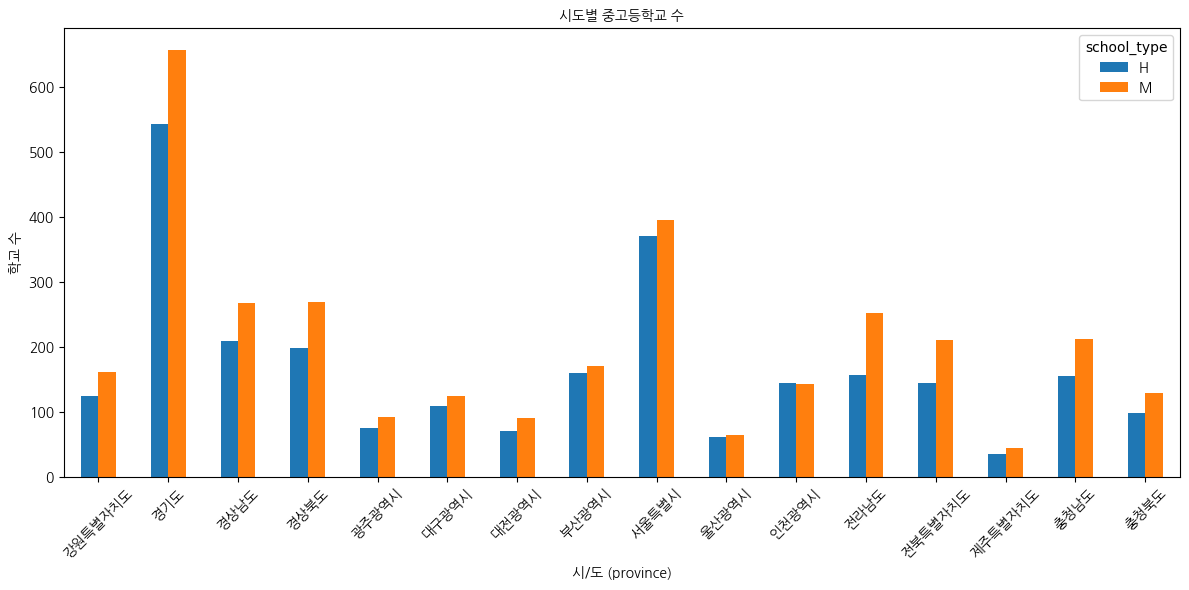

In [45]:
type_counts = accounts_school.groupby(['province', 'school_type']).size().unstack(fill_value=0)

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_prop = fm.FontProperties(fname=font_path)

# 시각화
type_counts.plot(kind='bar', figsize=(12, 6))
plt.title('시도별 중고등학교 수', fontproperties=font_prop)
plt.xlabel('시/도 (province)', fontproperties=font_prop)
plt.ylabel('학교 수', fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(title='school_type', prop=font_prop)
plt.tight_layout()
plt.show()


### 학급 테이블

In [46]:
accounts_school.describe().round(2)

,id,student_count
count,5948.00,5948.00
mean,2979.53,113.83
std,1718.22,102.86
min,4.00,0.00
25%,1492.75,16.00
50%,2979.50,97.00
75%,4467.25,183.00
max,5965.00,578.00


In [47]:
accounts_school.head()

,id,address,student_count,school_type,province,city,district
0,4,충청북도 충주시,239,H,충청북도,충주시,None
1,5,충청북도 충주시,160,M,충청북도,충주시,None
2,6,충청북도 충주시,200,H,충청북도,충주시,None
3,7,충청북도 충주시,114,H,충청북도,충주시,None
4,8,충청북도 충주시,139,M,충청북도,충주시,None


In [48]:
accounts_group.head()

,id,grade,class_num,school_id
0,1,1,1,1
1,8,3,2,1
2,9,3,3,1
3,10,2,2,1
4,11,2,3,1


In [49]:
accounts_group.sort_values(by = 'id', ascending = True, inplace = True)
accounts_group.head()

,id,grade,class_num,school_id
0,1,1,1,1
1,8,3,2,1
2,9,3,3,1
3,10,2,2,1
4,11,2,3,1


In [50]:
accounts_user_contacts.head()

,id,contacts_count,invite_user_id_list,user_id
0,259,30,[],1167696
1,1756,79,[],863169
2,13742,21,[854615],857205
3,13754,29,[],851431
4,13756,28,[849318],855476


In [51]:
accounts_group.school_id.nunique()

5604

In [52]:
accounts_group.describe()

,id,grade,class_num,school_id
count,84515.000000,84515.000000,84515.000000,84515.000000
mean,42279.376087,2.113992,5.318606,3079.496468
std,24400.962630,0.754896,4.089901,1675.036093
min,1.000000,1.000000,0.000000,1.000000
25%,21147.500000,2.000000,2.000000,1752.000000
50%,42279.000000,2.000000,4.000000,3023.000000
75%,63411.500000,3.000000,7.000000,4620.000000
max,84546.000000,20.000000,41.000000,5965.000000


### 구매기록

In [53]:
accounts_paymenthistory.head()

,id,productId,phone_type,created_at,user_id
0,6,heart.777,A,2023-05-13 21:28:34,1211127
1,7,heart.777,A,2023-05-13 21:29:39,1151343
2,8,heart.777,A,2023-05-13 21:31:33,1002147
3,9,heart.777,A,2023-05-13 21:31:39,1095040
4,11,heart.777,A,2023-05-13 21:34:32,1164081


In [54]:
accounts_paymenthistory.describe(include='all')

,id,productId,phone_type,created_at,user_id
count,95140.000000,95140,95140,95140,9.514000e+04
unique,NaN,4,2,NaN,NaN
top,NaN,heart.777,I,NaN,NaN
freq,NaN,57873,61632,NaN,NaN
mean,49136.797572,NaN,NaN,2023-05-27 21:47:32.003741952,1.256912e+06
min,6.000000,NaN,NaN,2023-05-13 21:28:34,8.330410e+05
25%,24531.750000,NaN,NaN,2023-05-16 11:48:44.750000128,1.116654e+06
50%,49176.500000,NaN,NaN,2023-05-21 12:40:45.500000,1.270988e+06
75%,73740.250000,NaN,NaN,2023-05-27 13:02:52.249999872,1.417660e+06
max,98078.000000,NaN,NaN,2024-05-08 14:12:45,1.583632e+06


In [55]:
display(accounts_paymenthistory.info())
print('-----')
display(accounts_paymenthistory.created_at.min())
print('-----')
display(accounts_paymenthistory.created_at.max())
print('-----')
display(accounts_paymenthistory.productId.value_counts())
print('-----')
display(accounts_paymenthistory.phone_type.nunique())
print('-----')
display(accounts_paymenthistory.phone_type.value_counts())
print('-----')
display(accounts_paymenthistory.user_id.nunique())
print('-----')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95140 entries, 0 to 95139
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          95140 non-null  int64         
 1   productId   95140 non-null  object        
 2   phone_type  95140 non-null  object        
 3   created_at  95140 non-null  datetime64[ns]
 4   user_id     95140 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.6+ MB


None

-----


Timestamp('2023-05-13 21:28:34')

-----


Timestamp('2024-05-08 14:12:45')

-----


productId
heart.777     57873
heart.1000    19309
heart.200     15822
heart.4000     2136
Name: count, dtype: int64

-----


2

-----


phone_type
I    61632
A    33508
Name: count, dtype: int64

-----


59192

-----


In [56]:
display(accounts_paymenthistory.user_id.value_counts().head(20))
display(accounts_paymenthistory.user_id.value_counts().mean())

user_id
1527451    60
1246471    51
1141603    35
1204373    34
1142775    30
1099530    27
1170271    27
1455819    25
1358363    25
1339014    24
1413488    24
1386131    24
925538     24
1356997    23
1213023    23
1331825    23
1555539    23
995869     22
1092952    22
987504     22
Name: count, dtype: int64

np.float64(1.607311798891742)

### 포인트 기록 테이블

In [57]:
accounts_pointhistory.head()

,id,delta_point,created_at,user_id,user_question_record_id
0,790629,9,2023-04-28 12:27:49,849436,771777.0
1,790652,9,2023-04-28 12:28:02,849436,771800.0
2,790664,5,2023-04-28 12:28:09,849436,771812.0
3,790680,13,2023-04-28 12:28:16,849436,771828.0
4,790703,5,2023-04-28 12:28:26,849436,771851.0


In [58]:
display(accounts_pointhistory.info())
print('-----')
display(accounts_pointhistory.created_at.min())
print('-----')
display(accounts_pointhistory.created_at.max())
print('-----')
display(accounts_pointhistory.user_id.nunique())
print('-----')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2338918 entries, 0 to 2338917
Data columns (total 5 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   id                       int64         
 1   delta_point              int64         
 2   created_at               datetime64[ns]
 3   user_id                  int64         
 4   user_question_record_id  float64       
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 89.2 MB


None

-----


Timestamp('2023-04-28 12:27:49')

-----


Timestamp('2024-05-08 01:36:18')

-----


5037

-----


In [59]:
# 1527451
accounts_pointhistory[accounts_pointhistory['user_id'] == 1527451]

,id,delta_point,created_at,user_id,user_question_record_id


In [60]:
# delta_point
print(accounts_pointhistory['delta_point'].min())
print(accounts_pointhistory['delta_point'].max())
print(accounts_pointhistory['delta_point'].mean())

-1000
1000
0.8610861945566283


In [61]:
# user_id
print(accounts_pointhistory.user_id.min())
print(accounts_pointhistory.user_id.max())

838023
1583358


### 투표 기록 테이블

In [62]:
accounts_userquestionrecord.head()


,id,status,created_at,chosen_user_id,question_id,user_id,question_piece_id,has_read,answer_status,answer_updated_at,report_count,opened_times
0,771777,C,2023-04-28 12:27:49,849469,252,849436,998458,0,N,2023-04-28 12:27:49,0,0
1,771800,C,2023-04-28 12:28:02,849446,244,849436,998459,0,N,2023-04-28 12:28:02,0,0
2,771812,C,2023-04-28 12:28:09,849454,183,849436,998460,1,N,2023-04-28 12:28:09,0,0
3,771828,C,2023-04-28 12:28:16,847375,101,849436,998461,0,N,2023-04-28 12:28:16,0,0
4,771851,C,2023-04-28 12:28:26,849477,209,849436,998462,1,N,2023-04-28 12:28:26,0,0


In [63]:
accounts_userquestionrecord.report_count.value_counts()

report_count
0     1217389
1         147
2          15
3           3
5           1
4           1
6           1
14          1
Name: count, dtype: int64

In [64]:
print(accounts_userquestionrecord.user_id.nunique())
print(accounts_userquestionrecord.chosen_user_id.nunique())

4849
15426


In [65]:
print(accounts_userquestionrecord.id.nunique()) # 질문id
print(accounts_userquestionrecord.question_piece_id.nunique())

1217558
1217558


In [66]:
# user_id
display(accounts_pointhistory.user_id.value_counts().head(20))

user_id
849103     2976
1159163    2375
1213990    2315
1206529    2311
1165022    2150
1037925    2147
876509     2099
856042     2027
1041046    2017
1236004    1958
967873     1901
935887     1894
916592     1882
1045301    1880
1428542    1876
1408262    1836
1185764    1816
922680     1774
1058255    1756
943631     1738
Name: count, dtype: int64

In [67]:
# question_id
accounts_userquestionrecord['question_id'].nunique()

4805

In [68]:
accounts_userquestionrecord.status.value_counts()

status
C    1156322
I      60578
B        658
Name: count, dtype: int64

In [69]:
accounts_userquestionrecord.created_at.min(), accounts_userquestionrecord.created_at.max()

(Timestamp('2023-04-28 12:27:49'), Timestamp('2024-05-08 01:36:18'))

In [70]:
# has_read 값별 분포 (0 = 안읽음, 1 = 읽음)
has_read_counts = accounts_userquestionrecord['has_read'].value_counts().sort_index()

# 열람하지 않은 투표 비율
not_read_ratio = has_read_counts.get(0, 0) / len(accounts_userquestionrecord)

print("has_read")
print(has_read_counts)
print(f"열람하지 않은 비율: {not_read_ratio:.2%}")

has_read
has_read
0    541627
1    675931
Name: count, dtype: int64
열람하지 않은 비율: 44.48%


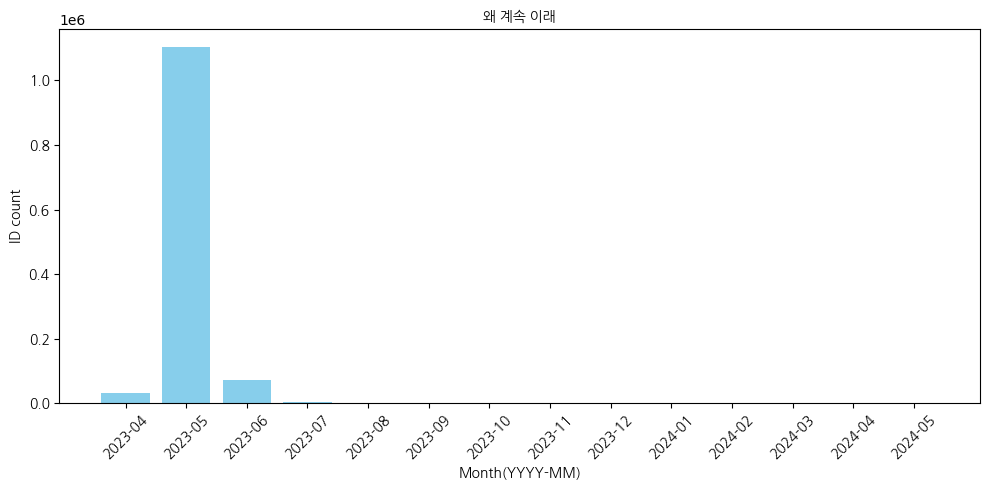

In [71]:

# 월 단위로 그룹화 (YYYY-MM 형식으로 변환)
accounts_userquestionrecord['month'] = accounts_userquestionrecord['created_at'].dt.to_period('M').astype(str)

# 월별 ID 개수 집계
monthly_counts = accounts_userquestionrecord.groupby('month')['id'].count().reset_index()

# 시각화
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_prop = fm.FontProperties(fname=font_path)


plt.figure(figsize=(10, 5))
plt.bar(monthly_counts['month'], monthly_counts['id'], color='skyblue')

# ✅ 모든 텍스트 요소에 font_prop 직접 지정
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.title('왜 계속 이래', fontsize=14, fontproperties=font_prop)
plt.xlabel('Month(YYYY-MM)', fontproperties=font_prop)
plt.ylabel('ID count', fontproperties=font_prop)

plt.tight_layout()
plt.show()


In [72]:
# 월별 ID 개수 테이블로 확인
monthly_counts = accounts_userquestionrecord.groupby('month')['id'].count().reset_index()
print(monthly_counts.sort_values('month'))

      month       id
0   2023-04    30798
1   2023-05  1104681
2   2023-06    71341
3   2023-07     5396
4   2023-08     2050
5   2023-09     1665
6   2023-10      330
7   2023-11      253
8   2023-12      502
9   2024-01      236
10  2024-02      154
11  2024-03       81
12  2024-04       33
13  2024-05       38


In [73]:
accounts_userquestionrecord.id.nunique()

1217558

In [74]:
accounts_userquestionrecord.question_id.nunique()

4805

In [75]:
accounts_userquestionrecord.user_id.nunique()

4849

In [76]:
# 3. 월별 has_read 값 개수 집계
monthly_read_counts = accounts_userquestionrecord.groupby(['month', 'has_read']).size().unstack(fill_value=0)
# 4. 열람하지 않은 비율 계산 (has_read == 0 비율)
monthly_read_counts['not_read_ratio'] = monthly_read_counts[0] / (monthly_read_counts[0] + monthly_read_counts[1])
# 결과 출력
print(monthly_read_counts)

has_read       0       1  not_read_ratio
month                                   
2023-04    25987    4811        0.843789
2023-05   467667  637014        0.423350
2023-06    39691   31650        0.556356
2023-07     3852    1544        0.713862
2023-08     1578     472        0.769756
2023-09     1396     269        0.838438
2023-10      291      39        0.881818
2023-11      220      33        0.869565
2023-12      434      68        0.864542
2024-01      214      22        0.906780
2024-02      148       6        0.961039
2024-03       79       2        0.975309
2024-04       33       0        1.000000
2024-05       37       1        0.973684


In [77]:
# 3. 월별 answer_status 분포
monthly_answer_status = accounts_userquestionrecord.groupby(['month', 'answer_status']).size().unstack(fill_value=0)

# 4. 미답변 비율 계산 (answer_status == 'N')
monthly_answer_status['not_answered_ratio'] = monthly_answer_status.get('N', 0) / monthly_answer_status.sum(axis=1)

# 결과 출력
print(monthly_answer_status)

answer_status       A       N     P  not_answered_ratio
month                                                  
2023-04            81   30708     9            0.997078
2023-05        108127  989017  7537            0.895296
2023-06          3553   67469   319            0.945725
2023-07             0    5396     0            1.000000
2023-08             0    2050     0            1.000000
2023-09             0    1665     0            1.000000
2023-10             0     330     0            1.000000
2023-11             0     253     0            1.000000
2023-12             0     502     0            1.000000
2024-01             0     236     0            1.000000
2024-02             0     154     0            1.000000
2024-03             0      81     0            1.000000
2024-04             0      33     0            1.000000
2024-05             0      38     0            1.000000


In [78]:
# 요일 (0=월 ~ 6=일), 시간대 (0~23시)
accounts_userquestionrecord['weekday'] = accounts_userquestionrecord['created_at'].dt.dayofweek
accounts_userquestionrecord['hour'] = accounts_userquestionrecord['created_at'].dt.hour

# 요일-시간대별 id 수
vote_heatmap = accounts_userquestionrecord.pivot_table(
    index='weekday', columns='hour', values='id', aggfunc='count', fill_value=0
)
vote_heatmap


hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,,,,
0,3643,4706,5184,6204,5918,6801,7967,9385,9692,10060,9835,11200,13014,15051,14674,11069,5815,2522,763,362,482,1741,7998,8804
1,3657,3793,5067,5092,5065,5544,5071,8207,10778,10602,10344,11106,11363,12391,13301,9970,5122,1730,637,185,328,1799,7489,9015
2,3823,3832,4153,4835,4498,6208,8913,8874,9368,9441,8894,10694,11559,13554,13165,10012,4653,1812,678,333,407,1935,7342,8302
3,3431,3715,3674,3826,4228,4498,5416,7268,9102,8615,8090,8113,10259,13027,12362,9815,4753,1770,566,335,351,1584,6078,8702
4,3585,3744,4432,5257,4980,5149,6969,8554,10284,10122,9901,11325,13804,15380,14965,12864,8031,3674,1622,687,366,740,1923,4205
5,7000,9298,9633,10141,11124,10780,10569,9511,10796,11204,11918,13433,13577,14060,12941,12216,10420,5603,2610,1188,668,734,1367,3740
6,6930,9261,10445,11437,12115,11542,10897,11281,11425,12024,12759,13558,13970,15696,15673,13681,8724,3299,1608,559,596,1702,6482,7391


In [79]:
# 응답까지 걸린 시간 (초)
accounts_userquestionrecord['response_time_sec'] = (
    accounts_userquestionrecord['answer_updated_at'] - accounts_userquestionrecord['created_at']
).dt.total_seconds()

# 0초 이상 30일 이하만 필터링
valid_responses = accounts_userquestionrecord[
    (accounts_userquestionrecord['response_time_sec'] > 0) &
    (accounts_userquestionrecord['response_time_sec'] < 2592000)
]

# 기본 통계
print(valid_responses['response_time_sec'].describe())

# 평균 9시간

count    1.196220e+05
mean     3.240718e+04
std      9.651538e+04
min      6.000000e+00
25%      5.600000e+02
50%      4.269000e+03
75%      2.442200e+04
max      2.386873e+06
Name: response_time_sec, dtype: float64


In [80]:
# 열람률: has_read 평균
read_rate = accounts_userquestionrecord.groupby(['weekday', 'hour'])['has_read'].mean().unstack()
read_rate

hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,,,,
0,0.562998,0.548661,0.545718,0.551580,0.532950,0.531687,0.568721,0.557059,0.571915,0.573062,0.566751,0.572857,0.571154,0.558634,0.550157,0.548740,0.514187,0.494449,0.473132,0.430939,0.524896,0.570362,0.562141,0.553498
1,0.543615,0.530451,0.501283,0.522584,0.497137,0.503608,0.514100,0.560253,0.566246,0.564893,0.570572,0.569602,0.568688,0.571140,0.554921,0.548044,0.519719,0.487283,0.492936,0.508108,0.500000,0.564758,0.549072,0.554520
2,0.529950,0.536534,0.509993,0.498242,0.490885,0.526740,0.553237,0.545864,0.548890,0.551425,0.542163,0.543015,0.536552,0.531135,0.511432,0.515382,0.458844,0.466336,0.414454,0.381381,0.459459,0.483204,0.520567,0.526138
3,0.461382,0.461911,0.486935,0.450078,0.428808,0.469542,0.525480,0.543478,0.533949,0.533604,0.539061,0.539998,0.551906,0.563522,0.568274,0.543556,0.545129,0.509040,0.489399,0.420896,0.490028,0.590278,0.598059,0.586647
4,0.514365,0.506677,0.496841,0.505802,0.513253,0.517965,0.562061,0.576105,0.551050,0.541691,0.547116,0.561148,0.552086,0.530299,0.540662,0.539024,0.527705,0.483125,0.489519,0.481805,0.601093,0.566216,0.579303,0.583829
5,0.589857,0.579372,0.591301,0.588699,0.579648,0.587477,0.575362,0.572810,0.596054,0.582649,0.605135,0.600610,0.617736,0.595590,0.600340,0.600606,0.584933,0.530430,0.525287,0.471380,0.525449,0.621253,0.617410,0.611497
6,0.601876,0.593348,0.596458,0.568506,0.583244,0.603535,0.578875,0.587093,0.571291,0.571025,0.574888,0.569406,0.577237,0.569763,0.564665,0.531979,0.539546,0.497727,0.486318,0.438283,0.484899,0.552291,0.556310,0.557841


In [81]:
# 응답 여부 컬럼
accounts_userquestionrecord['is_answered'] = accounts_userquestionrecord['answer_status'] == 'A'

# 응답률: is_answered 평균
answer_rate = accounts_userquestionrecord.groupby(['weekday', 'hour'])['is_answered'].mean().unstack()

answer_rate

hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,,,,
0,0.087565,0.087335,0.091821,0.086396,0.089726,0.088222,0.086356,0.093127,0.092551,0.098310,0.091307,0.099732,0.100123,0.094412,0.092272,0.093143,0.078418,0.068993,0.062910,0.082873,0.095436,0.084434,0.083771,0.082122
1,0.086136,0.087530,0.082692,0.078358,0.073445,0.074675,0.078683,0.094675,0.102802,0.097151,0.101508,0.104538,0.101118,0.101929,0.102248,0.095286,0.076337,0.088439,0.075353,0.075676,0.088415,0.088382,0.089465,0.085413
2,0.076641,0.086378,0.086203,0.083144,0.070920,0.074098,0.091776,0.088799,0.097886,0.093740,0.090173,0.096503,0.094991,0.094880,0.083707,0.079505,0.061466,0.067881,0.045723,0.090090,0.076167,0.059948,0.080904,0.076969
3,0.070825,0.066756,0.081111,0.066649,0.056528,0.067363,0.104690,0.093148,0.090749,0.097969,0.088999,0.083816,0.098743,0.100791,0.103948,0.106164,0.093835,0.075141,0.086572,0.068657,0.102564,0.103535,0.106449,0.103999
4,0.091492,0.084669,0.076264,0.081605,0.091365,0.087590,0.100301,0.109656,0.095974,0.084865,0.093021,0.104547,0.094103,0.092198,0.088473,0.081623,0.070975,0.056342,0.057953,0.065502,0.073770,0.075676,0.081123,0.084899
5,0.086857,0.083674,0.092702,0.092792,0.091244,0.095547,0.090926,0.096730,0.101982,0.102999,0.094982,0.104816,0.101790,0.097653,0.106483,0.097577,0.096833,0.079065,0.070115,0.069024,0.070359,0.070845,0.102414,0.090909
6,0.097835,0.096858,0.096314,0.091195,0.086339,0.098077,0.093787,0.092634,0.101269,0.096806,0.099538,0.096106,0.103078,0.099580,0.091431,0.089760,0.082416,0.059109,0.067164,0.041145,0.078859,0.066980,0.073897,0.083074


In [82]:
last_active = accounts_userquestionrecord.groupby('user_id')['created_at'].max().reset_index()
last_active.columns = ['user_id', 'last_activity_at']

print(last_active.head())


   user_id    last_activity_at
0   838023 2023-05-04 07:26:25
1   838466 2023-09-18 12:48:28
2   838642 2023-04-29 03:00:56
3   839357 2023-05-26 07:18:10
4   840293 2023-05-15 09:35:08


In [83]:
len(last_active)

4849

In [84]:
accounts_userquestionrecord.user_id.nunique()

4849

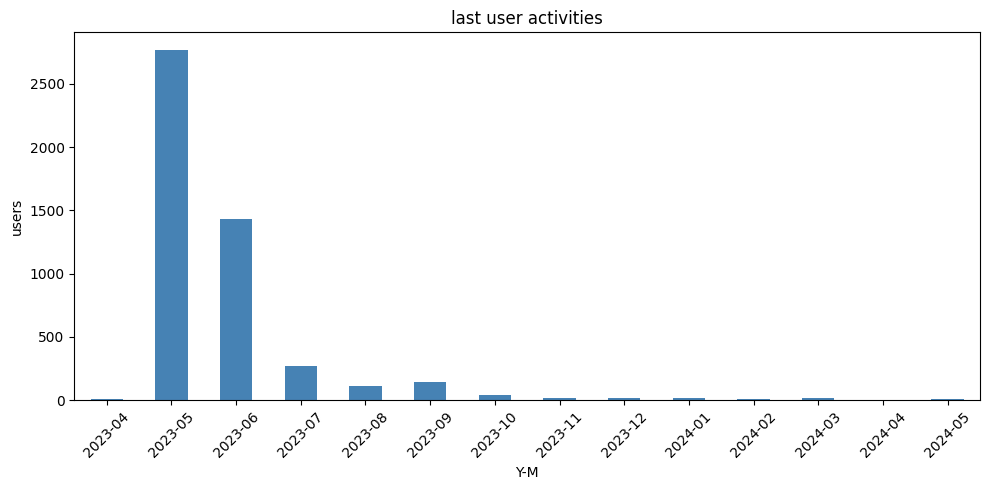

In [85]:
# 연-월(YYYY-MM) 단위로 변환
last_active['year_month'] = last_active['last_activity_at'].dt.to_period('M').astype(str)

# 연-월별 user 수 집계
monthly_last_active = last_active['year_month'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
monthly_last_active.plot(kind='bar', color='steelblue')
plt.title('last user activities')
plt.xlabel('Y-M')
plt.ylabel('users')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [86]:
monthly_last_active

year_month
2023-04      10
2023-05    2769
2023-06    1428
2023-07     270
2023-08     111
2023-09     143
2023-10      39
2023-11      14
2023-12      19
2024-01      16
2024-02       7
2024-03      13
2024-04       4
2024-05       6
Name: count, dtype: int64

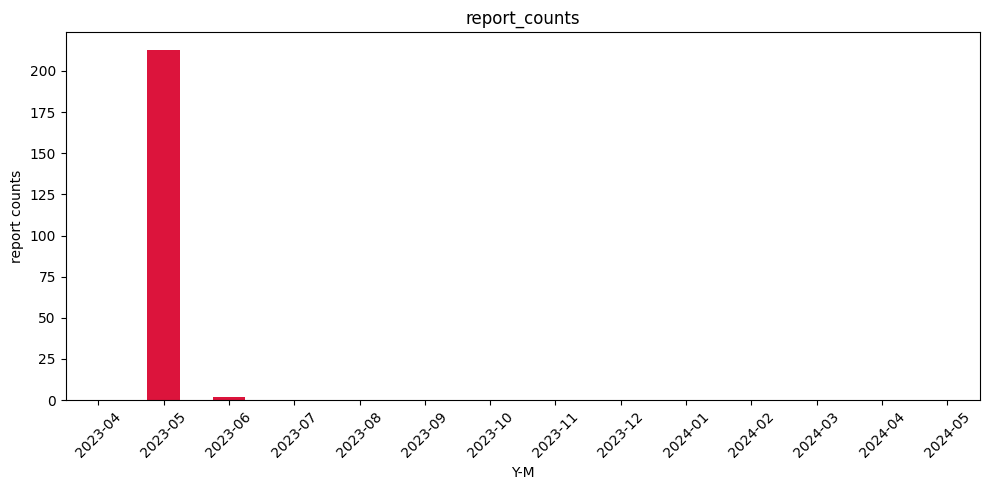

In [87]:
accounts_userquestionrecord# 연-월 컬럼 생성
accounts_userquestionrecord['year_month'] = accounts_userquestionrecord['created_at'].dt.to_period('M').astype(str)

# 월별 신고 총합 계산
monthly_reports = accounts_userquestionrecord.groupby('year_month')['report_count'].sum()

plt.figure(figsize=(10, 5))
monthly_reports.plot(kind='bar', color='crimson')
plt.title('report_counts')
plt.xlabel('Y-M')
plt.ylabel('report counts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [88]:
accounts_userquestionrecord.report_count.value_counts()

report_count
0     1217389
1         147
2          15
3           3
5           1
4           1
6           1
14          1
Name: count, dtype: int64

In [89]:
monthly_reports

year_month
2023-04      0
2023-05    213
2023-06      2
2023-07      0
2023-08      0
2023-09      0
2023-10      0
2023-11      0
2023-12      0
2024-01      0
2024-02      0
2024-03      0
2024-04      0
2024-05      0
Name: report_count, dtype: int64

### 탈퇴

In [90]:
# accounts_userwithdraw
accounts_userwithdraw = "gs://codeit-project/votes/accounts_userwithdraw.parquet" 

# GCP 키 경로
key_path = "config/key.json"

# 데이터 불러오기
accounts_userwithdraw = pd.read_parquet(accounts_userwithdraw, storage_options={"token": key_path})

# 확인
accounts_userwithdraw.head()

,id,reason,created_at
0,42,재밌는 질문이 없어서,2023-03-29 13:22:12
1,43,함께 할 친구가 없어서,2023-03-29 13:24:59
2,44,함께 할 친구가 없어서,2023-03-29 13:53:32
3,45,함께 할 친구가 없어서,2023-03-29 13:54:03
4,46,재밌는 질문이 없어서,2023-03-30 00:31:19


In [91]:
len(accounts_userwithdraw)

70764

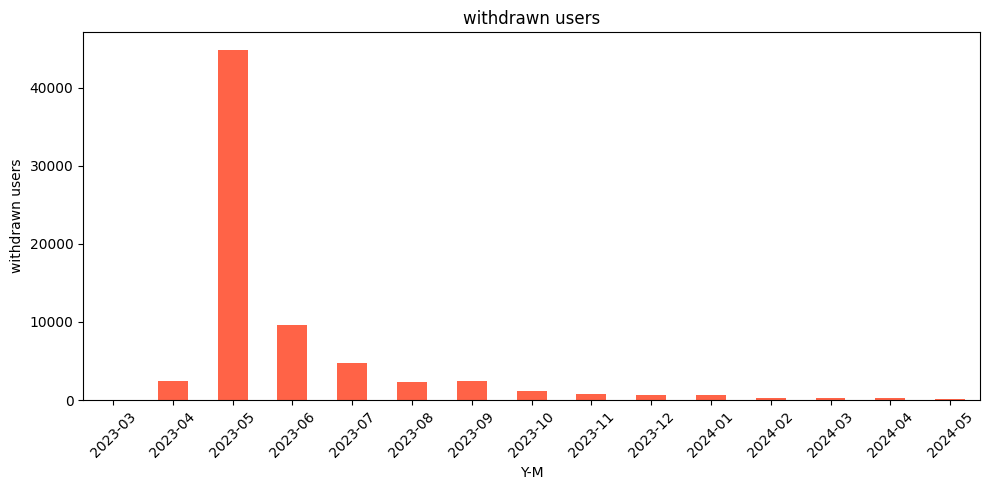

In [92]:
# 연-월 컬럼 생성
accounts_userwithdraw['year_month'] = accounts_userwithdraw['created_at'].dt.to_period('M').astype(str)

# 월별 탈퇴자 수 집계
monthly_withdraw_count = accounts_userwithdraw['year_month'].value_counts().sort_index()

# 시각화
plt.figure(figsize=(10, 5))
monthly_withdraw_count.plot(kind='bar', color='tomato')
plt.title('withdrawn users')
plt.xlabel('Y-M')
plt.ylabel('withdrawn users')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [93]:
monthly_withdraw_count

year_month
2023-03       17
2023-04     2397
2023-05    44845
2023-06     9642
2023-07     4811
2023-08     2310
2023-09     2450
2023-10     1164
2023-11      837
2023-12      693
2024-01      697
2024-02      319
2024-03      250
2024-04      240
2024-05       92
Name: count, dtype: int64

# 